<a id="top4"></a>
## Baseline

In this section I apply a `DummyClassifier` with the `most_frequent` strategy to be used as a baseline.

In [1]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format='retina'

# Import the dataset
df = pd.read_csv('emotions_data_transformed.csv')

# Convert target to numerical values
df['emotion'].replace({'angry':0,'disgust':1,'fear':2,'happy':3,'neutral':4,'sad':5,'surprise':6}, inplace=True)

# Create feature matrix (X) and numerical target (y)
X = df.drop(columns=['path','filename','dataset','duration','age','emotion'])
y = df.emotion.values

# Split the data
from sklearn.model_selection import train_test_split

# Create train and test set
X_tr, X_te, y_tr, y_te = train_test_split(X, y, train_size=0.9, shuffle=True, stratify=y, random_state=0)

# Checking size
print('Shape of X_tr: ', X_tr.shape)
print('Shape of y_tr: ', y_tr.shape)
print('Shape of X_te: ', X_te.shape)
print('Shape of y_te: ', y_te.shape)

Shape of X_tr:  (8361, 90)
Shape of y_tr:  (8361,)
Shape of X_te:  (930, 90)
Shape of y_te:  (930,)


Create and fit the `DummyClassifier`

In [2]:
from sklearn.dummy import DummyClassifier

# Create classifier
dummy = DummyClassifier(strategy="most_frequent")

# Fit classifier
dummy.fit(None, y_tr)

# Compute test accuracy
accuracy = dummy.score(None, y_te)
print("Accuracy: {:.2f}".format(accuracy))

Accuracy: 0.26


We can also plot the confusion matrix to see the proportions in the test data:

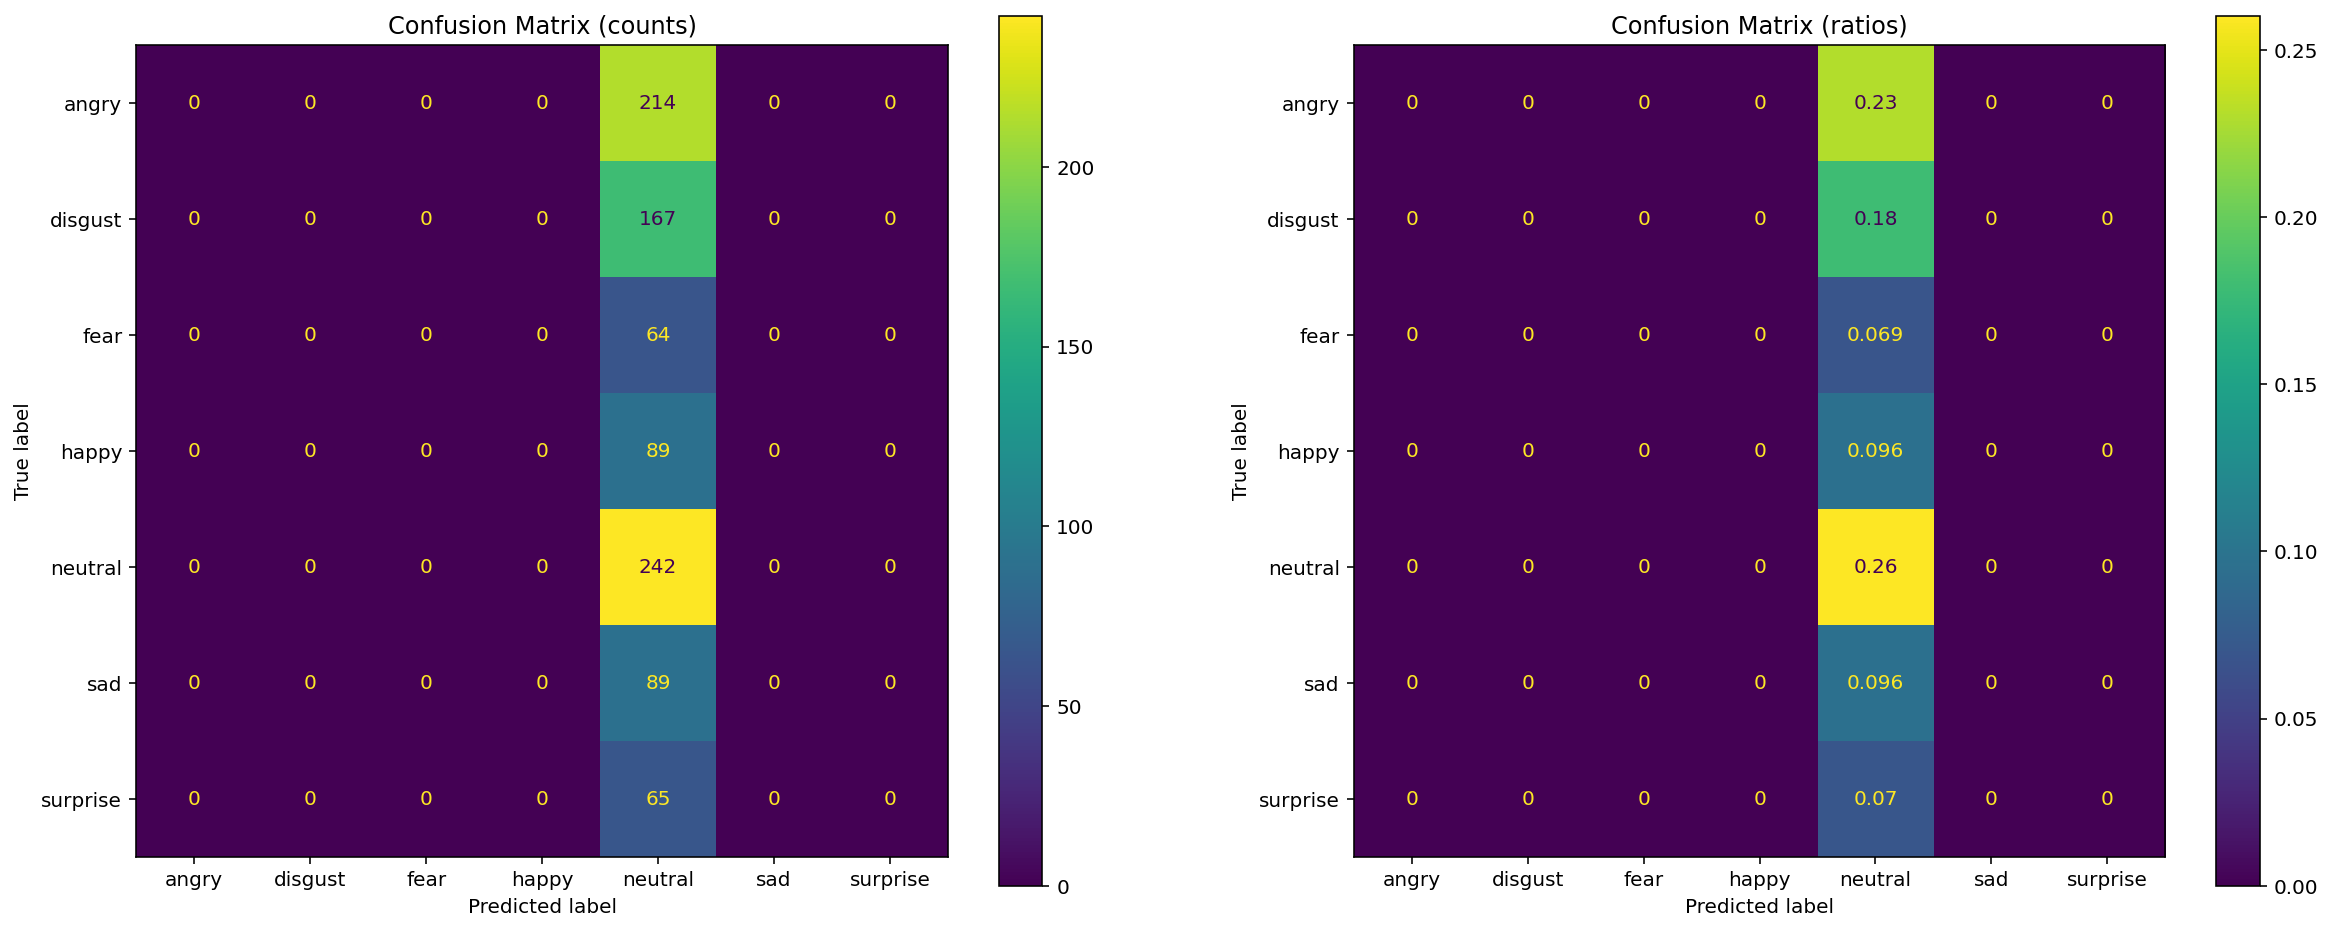

In [3]:
# "Most-frequent" predictions
y_pred = dummy.predict(X_te)

from sklearn.metrics import ConfusionMatrixDisplay

labels = {'angry':0,'disgust':1,'fear':2,'happy':3,'neutral':4,'sad':5,'surprise':6}

def plot_confusion_matrices(y_true, y_pred):

    # Create two subplots
    f, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 8))

    # Plots the standard confusion matrix
    ax1.set_title("Confusion Matrix (counts)")
    ConfusionMatrixDisplay.from_predictions(y_true, y_pred, display_labels=labels, ax=ax1)

    # Plots the normalized confusion matrix
    ax2.set_title("Confusion Matrix (ratios)")
    ConfusionMatrixDisplay.from_predictions(y_true, y_pred, display_labels=labels, normalize="pred", ax=ax2)

    plt.show()

# Plot confusion matrices
plot_confusion_matrices(y_te, y_pred)

As can be seen, the classifier always predicts the `neutral` emotion, which is the most frequent category and accounts for **26%** of the samples. The ratios on the right matrix also highlight the class imbalance, a problem that will be addressed in each following model.

<br>[Back to top](#top4)